In [ ]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import DataFrame
from pandas import Grouper
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
# from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# tỉ lệ 8:2
df = pd.read_csv('DIG Historical Data 1_6.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df['Price'].str.replace(',', '')
# Chuyển sang dạng số
df = pd.to_numeric(df)
df = df[::-1]

df = df.reset_index(drop=True) # Reset the index

In [ ]:
scaler = StandardScaler()
df1 = scaler.fit_transform(np.array(df).reshape(-1, 1))


In [ ]:
# Assuming df is your DataFrame containing your data
train_size = int(0.8 * len(df))

# Split the data into training and testing sets
train_data = df1[:train_size]
test_data = df1[train_size:]



In [ ]:
train_data
test_data.shape

(320, 1)

In [ ]:
# !pip install tbats

In [ ]:
from tbats import BATS, TBATS
# 3. Quá trình Training
y_train = np.array(train_data)

estimator = TBATS(
    seasonal_periods=[12, 30.25],
    use_arma_errors=True,
    use_box_cox=True
)
model = estimator.fit(y_train)


In [ ]:
# 4. Quá trình testing
y_test = np.array(test_data)
y_pred =  model.forecast(steps=350)

In [ ]:
print(y_pred[-30:])

[-0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138
 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138
 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138
 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138
 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138]


In [ ]:

y_next_30_days = y_pred[-30:]
y_pred = y_pred[:320]
print(y_pred)
print(y_next_30_days)

[-0.40201194 -0.40184983 -0.40172014 -0.40161639 -0.40153338 -0.40146698
 -0.40141386 -0.40137136 -0.40133737 -0.40131017 -0.40128841 -0.401271
 -0.40125708 -0.40124594 -0.40123703 -0.4012299  -0.40122419 -0.40121963
 -0.40121598 -0.40121306 -0.40121072 -0.40120885 -0.40120736 -0.40120616
 -0.4012052  -0.40120444 -0.40120383 -0.40120334 -0.40120294 -0.40120263
 -0.40120238 -0.40120218 -0.40120202 -0.40120189 -0.40120179 -0.40120171
 -0.40120164 -0.40120159 -0.40120155 -0.40120151 -0.40120148 -0.40120146
 -0.40120145 -0.40120143 -0.40120142 -0.40120141 -0.40120141 -0.4012014
 -0.40120139 -0.40120139 -0.40120139 -0.40120139 -0.40120138 -0.40120138
 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138
 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138
 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138
 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40120138
 -0.40120138 -0.40120138 -0.40120138 -0.40120138 -0.40

In [ ]:
train_data = df[:train_size]
test_data = df[train_size:]
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_next_30_days = scaler.inverse_transform(y_next_30_days.reshape(-1, 1))


In [ ]:
test_mae = mean_absolute_error(test_data, y_pred)
test_mape = mean_absolute_percentage_error(test_data, y_pred)
test_rmse = sqrt(mean_squared_error(test_data, y_pred))

print('MAE:', test_mae)
print('RMSE:', test_rmse)
print('MAPE:', test_mape)


MAE: 9896.61659039693
RMSE: 10921.962997482593
MAPE: 0.3877819851190175


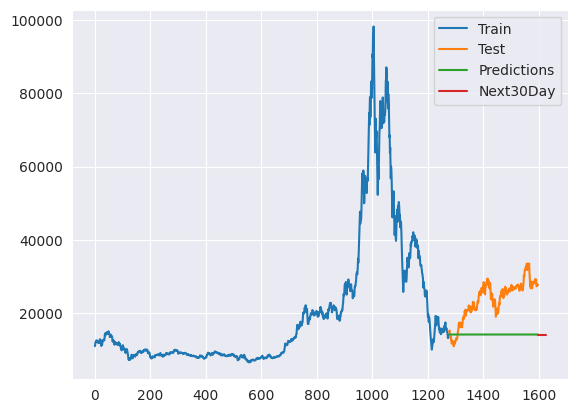

In [ ]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()